<a href="https://colab.research.google.com/github/JaiVR/customer_satisfaction_score_prediction/blob/main/Fods_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

#Data Preprocessing and PCA

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features  #Categorical data color is not extracted
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [4]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


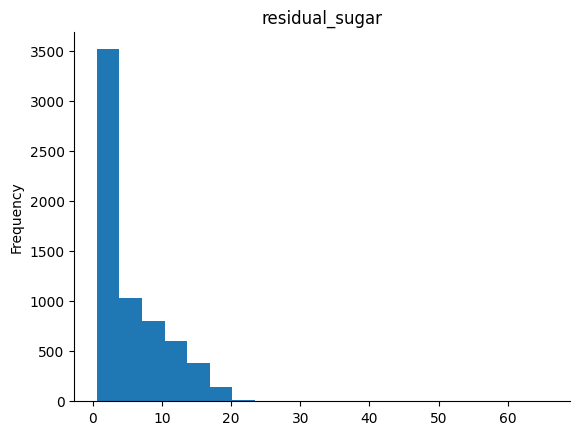

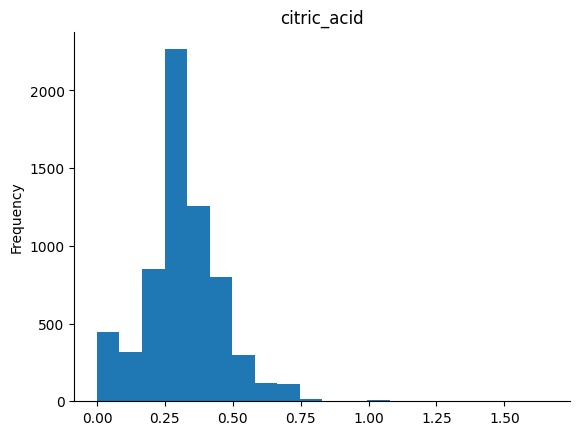

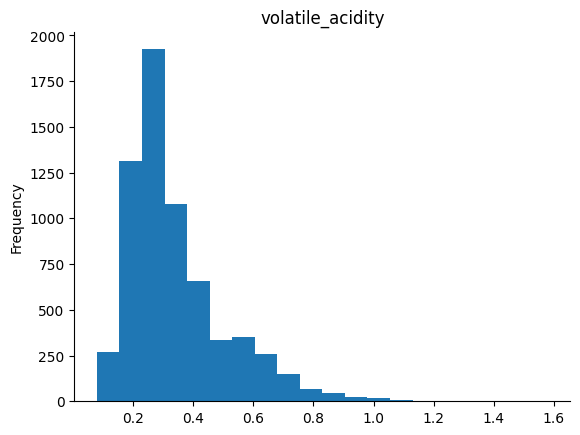

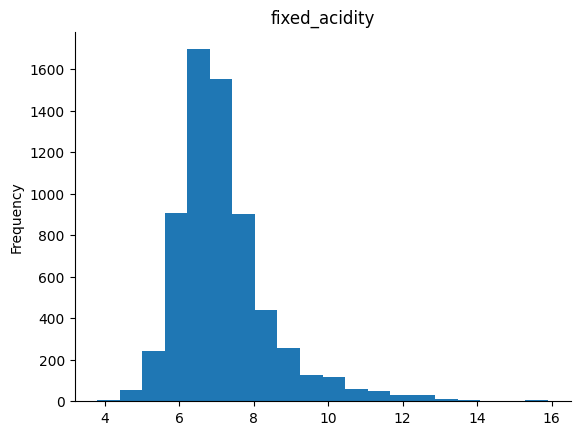

In [ ]:
#Some visualizations

from matplotlib import pyplot as plt

X[ww'residual_sugar'].plot(kind='hist', bins=20, title='residual_sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

X['citric_acid'].plot(kind='hist', bins=20, title='citric_acid')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

X['volatile_acidity'].plot(kind='hist', bins=20, title='volatile_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

X['fixed_acidity'].plot(kind='hist', bins=20, title='fixed_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [5]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [6]:
X.fillna(0, inplace=True)
print("Any NaN values remaining?", X.isnull().any())

Any NaN values remaining? fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


<ipython-input-6-21c4f0794b62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [7]:
y.fillna(0, inplace=True)
print("Any NaN values remaining?", y.isnull().any())

Any NaN values remaining? quality    False
dtype: bool


<ipython-input-7-c740f80171c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)


In [8]:
#X without pca
Xwp=X
Xwp_n=Xwp.to_numpy()

PCA

PCA Results:
Explained Variance Ratios = [0.2754426  0.22671146 0.14148609]
Cumulative Explained Variance Ratios = [0.2754426  0.50215406 0.64364015]


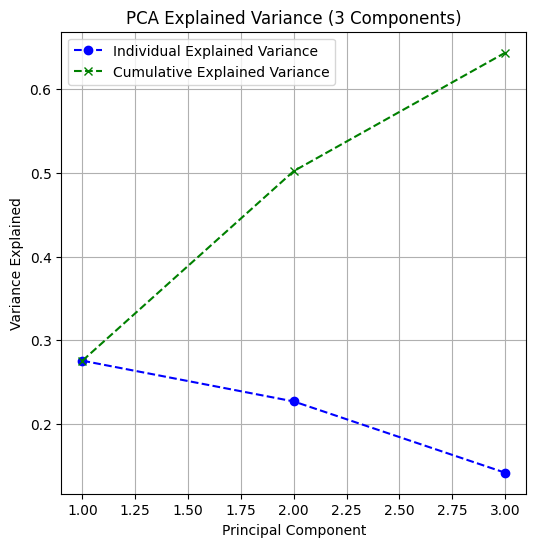

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_stand = scaler.fit_transform(Xwp)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_stand)
#Results
var = pca.explained_variance_ratio_
c_var = var.cumsum()
print("PCA Results:")
print(f"Explained Variance Ratios = {var}")
print(f"Cumulative Explained Variance Ratios = {c_var}")
#Visualization
plt.figure(figsize=(6, 6))
plt.plot(range(1, 4), var, marker='o', linestyle='--', color='b', label='Individual Explained Variance')
plt.plot(range(1, 4), c_var, marker='x', linestyle='--', color='g', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance (3 Components)')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
#Data Preprocessing and pca complete

#Regression

#Classification

In [ ]:
wine = pd.DataFrame(Xwp, columns=wine_quality.feature_names)
wine['quality'] = y
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Text(0.5, 0, 'Quality')

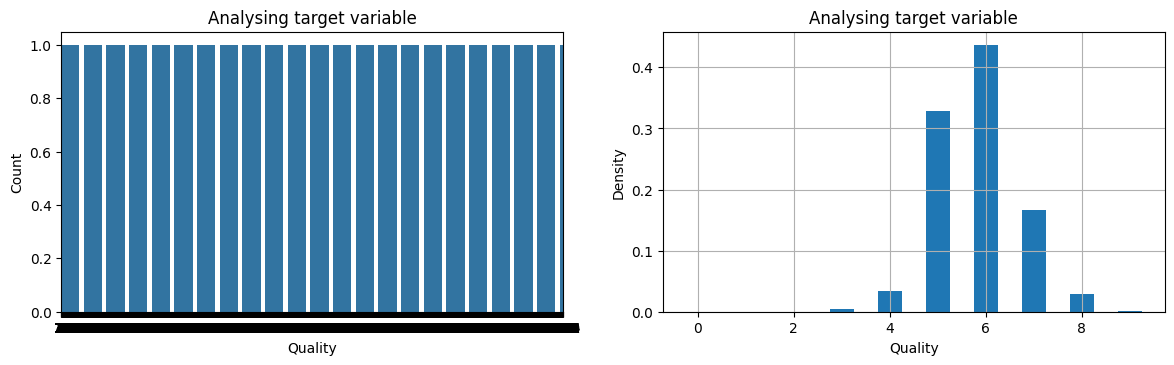

In [ ]:
fig = plt.figure(figsize=(22,8))
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['quality'])
plt.title("Analysing target variable"); plt.ylabel("Count"); plt.xlabel("Quality")

plt.subplot2grid((2,3),(0,1))
wine['quality'].hist(bins=np.arange(11)-0.5, rwidth=0.5, density=True)
plt.title("Analysing target variable"); plt.ylabel("Density"); plt.xlabel("Quality")

<ipython-input-16-535b8790fad1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'])


Text(0.5, 1.0, 'Analysing target variable')

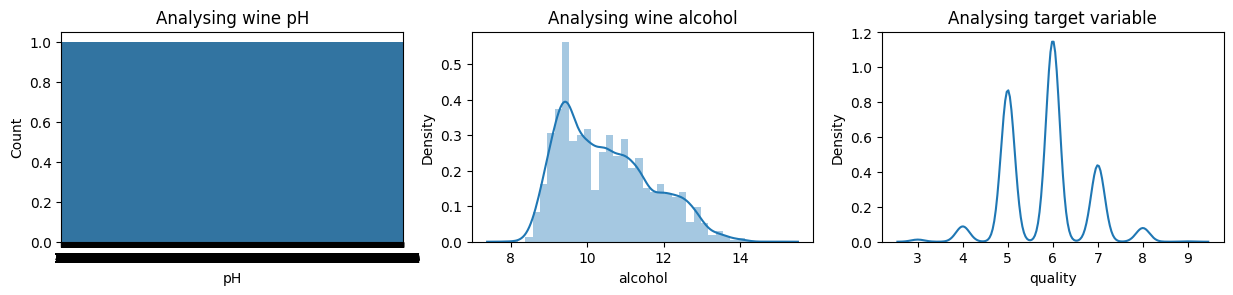

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['pH'])
plt.title("Analysing wine pH"); plt.ylabel("Count"); plt.xlabel("pH")

plt.subplot2grid((2,3),(0,1))
sns.distplot(wine['alcohol'])
plt.title("Analysing wine alcohol"); plt.ylabel("Density"); plt.xlabel("alcohol")

plt.subplot2grid((2,3),(0,2))
sns.kdeplot(wine.query('quality > 2').quality)
plt.title("Analysing target variable")

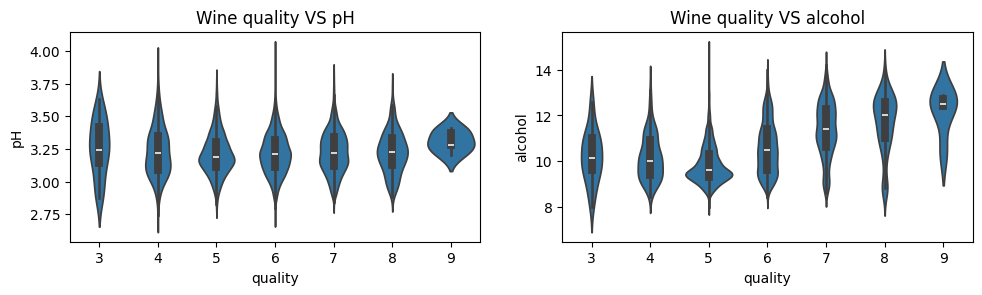

In [ ]:
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3),(0,0))
sns.violinplot(x='quality', y='pH', data=wine)
plt.title("Wine quality VS pH");

plt.subplot2grid((2,3),(0,1))
sns.violinplot(x='quality', y='alcohol', data=wine)
plt.title("Wine quality VS alcohol");

In [ ]:
wine['def_quality'] = [0 if x < 7 else 1 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','def_quality'], axis = 1)
y= wine['def_quality']

Text(0.5, 0, 'Type of wine')

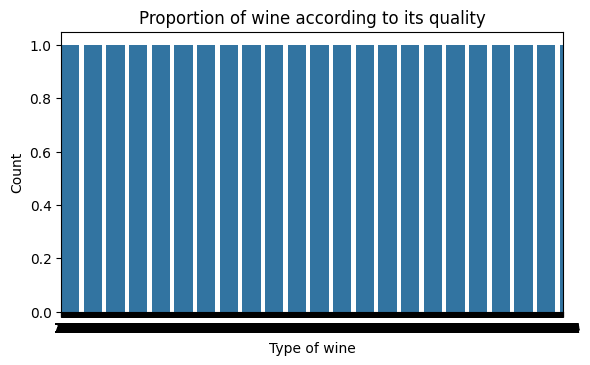

In [ ]:
wine['def_quality'].value_counts()

fig = plt.figure(figsize=(22,8))
plt.subplot2grid((2,3),(0,0))
sns.countplot(wine['def_quality'])
plt.title("Proportion of wine according to its quality"); plt.ylabel("Count"); plt.xlabel("Type of wine")

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import tensorflow as tf
import numpy as np
import pandas as pd


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Linear SVM": SVC(kernel='linear', random_state=42),
    "Kernel SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Initialize results storage
results = []

# Train and evaluate models
for model_name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy
    })

# Train a basic neural network
# Define the NN architecture
input_dim = X_train.shape[1]
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict and evaluate the NN
y_pred_nn = np.argmax(model_nn.predict(X_test), axis=-1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_nn, average="weighted")
accuracy = accuracy_score(y_test, y_pred_nn)

# Append NN results
results.append({
    "Model": "Neural Network",
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Accuracy": accuracy
})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-Score", ascending=False, inplace=True)
results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Model,Precision,Recall,F1-Score,Accuracy
5,Decision Tree,0.846940,0.843846,0.845290,0.843846
6,Neural Network,0.829301,0.843846,0.830611,0.843846
2,KNN,0.820682,0.831538,0.824556,0.831538
4,Kernel SVM,0.810548,0.830769,0.801379,0.830769
0,Logistic Regression,0.795473,0.821538,0.791775,0.821538
1,Naive Bayes,0.798965,0.750769,0.767729,0.750769
3,Linear SVM,0.644933,0.803077,0.715369,0.803077


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to top 3 principal components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reinitialize results storage for PCA-based models
pca_results = []

# Train and evaluate models on PCA-transformed data
for model_name, model in models.items():
    # Train
    model.fit(X_train_pca, y_train)
    # Predict
    y_pred = model.predict(X_test_pca)
    # Evaluate
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    accuracy = accuracy_score(y_test, y_pred)
    pca_results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy
    })

# Train a basic neural network on PCA-transformed data
# Define the NN architecture for PCA data
input_dim_pca = X_train_pca.shape[1]
model_nn_pca = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_dim_pca,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model_nn_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_nn_pca.fit(X_train_pca, y_train, epochs=50, batch_size=16, verbose=0)

# Predict and evaluate the NN on PCA-transformed data
y_pred_nn_pca = np.argmax(model_nn_pca.predict(X_test_pca), axis=-1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_nn_pca, average="weighted")
accuracy = accuracy_score(y_test, y_pred_nn_pca)

# Append NN results
pca_results.append({
    "Model": "Neural Network",
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Accuracy": accuracy
})

# Convert PCA results to a DataFrame for better visualization
pca_results_df = pd.DataFrame(pca_results)
pca_results_df.sort_values(by="F1-Score", ascending=False, inplace=True)
pca_results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Model,Precision,Recall,F1-Score,Accuracy
5,Decision Tree,0.829888,0.832308,0.831037,0.832308
2,KNN,0.793142,0.811538,0.799052,0.811538
1,Naive Bayes,0.771350,0.809231,0.764272,0.809231
6,Neural Network,0.768997,0.808462,0.754031,0.808462
0,Logistic Regression,0.750326,0.803077,0.738279,0.803077
4,Kernel SVM,0.843347,0.805385,0.720848,0.805385
3,Linear SVM,0.644933,0.803077,0.715369,0.803077


#Clustering

In [9]:
#dataset after removing catrgorical features, but before PCA

clustering_dataset = pd.DataFrame(Xwp, columns=wine_quality.feature_names)
clustering_dataset['target'] = y
print(clustering_dataset)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [10]:
#applying z-score transformation over the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clustering_dataset_scaled = sc.fit_transform(clustering_dataset)

In [11]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist,cdist
from sklearn.metrics import davies_bouldin_score

def beta_cv(X, labels):
    n_clusters = len(np.unique(labels))
    unique_clusters = np.unique(labels)
    # Cohesion: Intra-cluster distances (within-cluster compactness)
    intra_distances = []
    for cluster in unique_clusters:
        points_in_cluster = X[labels == cluster]
        intra_distances.append(np.mean(pdist(points_in_cluster)))
    # Separation: Inter-cluster distances (between-cluster separation)
    inter_distances = []
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            points_cluster_i = X[labels == unique_clusters[i]]
            points_cluster_j = X[labels == unique_clusters[j]]
            inter_distances.append(np.mean(pairwise_distances(points_cluster_i, points_cluster_j)))
    cohesion = np.mean(intra_distances)
    separation = np.mean(inter_distances)
    return cohesion / separation  # Beta CV = Cohesion / Separation
def dunn_index(X, labels):
    """
    Calculates the Dunn index for a given clustering result.
    Parameters:
        X (array-like): The data points.
        labels (array-like): Cluster labels for each data point.
    Returns:
        float: The Dunn index.
    """
    unique_clusters = np.unique(labels)
    num_clusters = len(unique_clusters)
    max_intracluster_dist = 0.0
    min_intercluster_dist = np.inf
    # Calculate maximum intracluster distance
    for i in unique_clusters:
        cluster_i_points = X[labels == i]
        # Handle clusters with single or no data points
        if len(cluster_i_points) <= 1:
            intracluster_dist = 0  # or any other appropriate value
        else:
            intracluster_dist = np.max(pdist(cluster_i_points))

        if intracluster_dist > max_intracluster_dist:
            max_intracluster_dist = intracluster_dist

    # Calculate minimum intercluster distance
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i_points = X[labels == unique_clusters[i]]
            cluster_j_points = X[labels == unique_clusters[j]]
            intercluster_dist = np.min(cdist(cluster_i_points, cluster_j_points))
            if intercluster_dist < min_intercluster_dist:
                min_intercluster_dist = intercluster_dist

    # Calculate Dunn index
    if max_intracluster_dist == 0:  # Handle case where all clusters have single points
        return 0  # or any other appropriate value
    else:
        return min_intercluster_dist / max_intracluster_dist


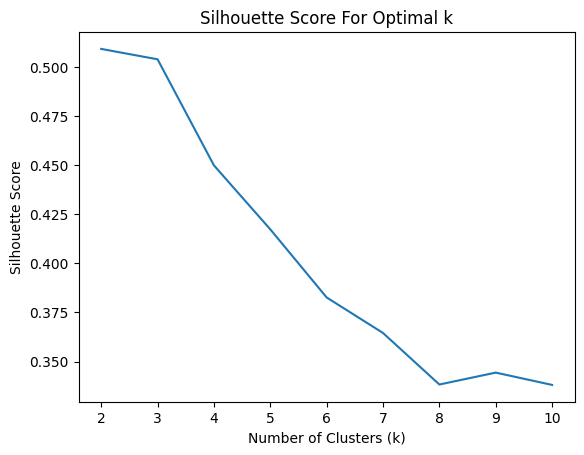

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(clustering_dataset)
    score = silhouette_score(clustering_dataset, kmeans.labels_, metric='euclidean')
    silhouette_scores[k] = score

plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score For Optimal k")
plt.show()

In [13]:
import numpy as np
#applying k-means on original dataset(clustering_dataset)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#n_clusters can be 2/3 we'll go with 3

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_dataset)
if isinstance(clustering_dataset, np.ndarray):
    clustering_dataset = pd.DataFrame(clustering_dataset)

clustering_dataset['Cluster'] = kmeans.labels_
silhouette_kmeans = silhouette_score(clustering_dataset, kmeans.labels_)
print(f"Silhouette Score: {silhouette_kmeans}")

sse_kmeans = kmeans.inertia_  # Sum of Squared Errors (inertia)
print(f"SSE (Sum of Squared Errors): {sse_kmeans}")

dunn_kmeans = dunn_index(clustering_dataset, kmeans.labels_)
print(f"Dunn's Index: {dunn_kmeans}")

betacv_kmeans = beta_cv(clustering_dataset, kmeans.labels_)
print(f"Beta CV (Cohesion vs Separation Index): {betacv_kmeans}")

Silhouette Score: 0.5040896458151084
SSE (Sum of Squared Errors): 4336925.779108999
Dunn's Index: 0.004979638142755567
Beta CV (Cohesion vs Separation Index): 0.3154979123385314


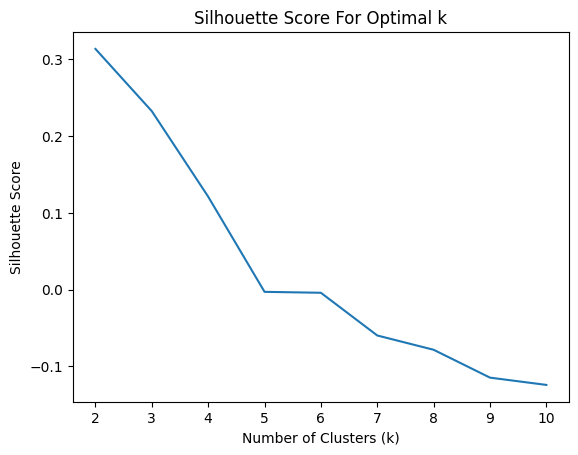

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(clustering_dataset_scaled)
    score = silhouette_score(clustering_dataset, kmeans.labels_, metric='euclidean')
    silhouette_scores[k] = score

plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score For Optimal k")
plt.show()

In [15]:
#applying k-means on newly transformed dataset(clustering_dataset_scaled)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#n_clusters can be 2/3 from the above plot we'll go with 3 here

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_dataset_scaled)
if isinstance(clustering_dataset_scaled, np.ndarray):
    clustering_dataset_scaled = pd.DataFrame(clustering_dataset_scaled)

clustering_dataset_scaled['Cluster'] = kmeans.labels_
sihouette_kmeans_scaled = silhouette_score(clustering_dataset_scaled, kmeans.labels_)
print(f"Silhouette Score: {sihouette_kmeans_scaled}")

sse_kmeans_scaled = kmeans.inertia_  # Sum of Squared Errors (inertia)
print(f"SSE (Sum of Squared Errors): {sse_kmeans_scaled}")

dunn_kmeans_scaled = dunn_index(clustering_dataset_scaled, kmeans.labels_)
print(f"Dunn's Index: {dunn_kmeans_scaled}")

betacv_kmeans_scaled = beta_cv(clustering_dataset_scaled, kmeans.labels_)
print(f"Beta CV (Cohesion vs Separation Index): {betacv_kmeans_scaled}")

Silhouette Score: 0.23709692917784259
SSE (Sum of Squared Errors): 51536.72185568844
Dunn's Index: 0.03788228615279488
Beta CV (Cohesion vs Separation Index): 0.6969354961009088


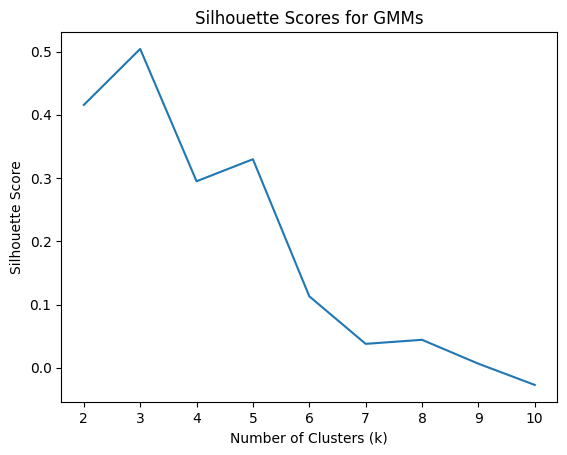

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your data 'X' is ready and appropriately preprocessed
# Example: X = np.random.rand(100, 5)  # Random data for demonstration; replace with your dataset

silhouette_scores = {}
for k in range(2, 11):  # Silhouette score isn't defined for k=1
    gmm = GaussianMixture(n_components=k, random_state=1).fit(clustering_dataset)
    labels = gmm.predict(clustering_dataset)
    score = silhouette_score(clustering_dataset, labels, metric='euclidean')
    silhouette_scores[k] = score

# Plotting the results
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for GMMs")
plt.show()

In [17]:
#gmms without z score transformation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

optimal_k = 3 # this is clear from the plot above

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(clustering_dataset.iloc[:, :-1])

clustering_dataset['Cluster_gmm'] = gmm.predict(clustering_dataset.iloc[:, :-1])

silhouette_gmm = silhouette_score(clustering_dataset, clustering_dataset['Cluster_gmm'])
print(f"Silhouette Score for GMM: {silhouette_gmm}")

dunn_gmm = dunn_index(clustering_dataset, clustering_dataset['Cluster_gmm'])
print(f"Dunn's Index for GMM: {dunn_gmm}")

betacv_gmm = beta_cv(clustering_dataset, clustering_dataset['Cluster_gmm'])
print(f"Beta CV for GMM: {betacv_gmm}")

Silhouette Score for GMM: 0.18163505638733385
Dunn's Index for GMM: 0.0021530550232642174
Beta CV for GMM: 0.5978153448015334


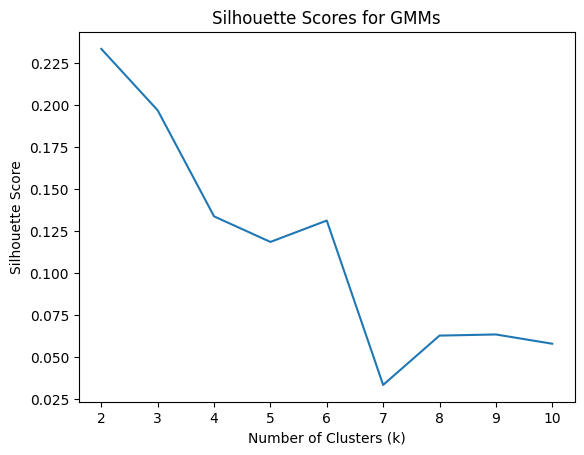

In [20]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = {}
for k in range(2, 11):  # Silhouette score isn't defined for k=1
    gmm = GaussianMixture(n_components=k, random_state=1).fit(clustering_dataset_scaled.iloc[:, :-1])
    labels = gmm.predict(clustering_dataset_scaled.iloc[:, :-1])
    score = silhouette_score(clustering_dataset_scaled.iloc[:, :-1], labels, metric='euclidean')
    silhouette_scores[k] = score

# Plotting the results
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for GMMs")
plt.show()

In [21]:
#gmms with z score transformation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

optimal_k = 3 # we can go with either 2/3 we'll go with 3

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(clustering_dataset_scaled.iloc[:, :-1])

clustering_dataset_scaled['Cluster_gmm'] = gmm.predict(clustering_dataset_scaled.iloc[:, :-1])

silhouette_gmm_scaled = silhouette_score(clustering_dataset_scaled, clustering_dataset_scaled['Cluster_gmm'])
print(f"Silhouette Score for GMM: {silhouette_gmm_scaled}")

dunn_gmm_scaled = dunn_index(clustering_dataset_scaled, clustering_dataset_scaled['Cluster_gmm'])
print(f"Dunn's Index for GMM: {dunn_gmm_scaled}")

betacv_gmm_scaled = beta_cv(clustering_dataset_scaled, clustering_dataset_scaled['Cluster_gmm'])
print(f"Beta CV for GMM: {betacv_gmm_scaled}")

Silhouette Score for GMM: 0.2234933005610476
Dunn's Index for GMM: 0.04029762790197269
Beta CV for GMM: 0.8056100378339276


In [23]:
#summarizing all results
import pandas as pd

summary_data = {
    "Model": ["Kmeans", "gmm","Kmeans-scaled","gmm-scaled"],
    "Silhoute-score": [
        silhouette_kmeans,
        silhouette_gmm,
        sihouette_kmeans_scaled,
        silhouette_gmm_scaled,
    ],
    "SSE": [
        sse_kmeans,
        "NA",
        sse_kmeans_scaled,
        "NA",
    ],
    "Dunn-index": [
        dunn_kmeans,
        dunn_gmm,
        dunn_kmeans_scaled,
        dunn_gmm_scaled,
    ],
    "BetaCV": [
        betacv_kmeans,
        betacv_gmm,
        betacv_kmeans_scaled,
        betacv_gmm_scaled,
    ]
}

ds = pd.DataFrame(summary_data)
print(ds)

           Model  Silhoute-score             SSE  Dunn-index    BetaCV
0         Kmeans        0.504090  4336925.779109    0.004980  0.315498
1            gmm        0.181635              NA    0.002153  0.597815
2  Kmeans-scaled        0.237097    51536.721856    0.037882  0.696935
3     gmm-scaled        0.223493              NA    0.040298  0.805610
